## 파일 생성

In [1]:
from pandas import DataFrame, Series 
import pandas as pd 

In [2]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Oct 28 13:37 sample_data


In [3]:
f = open("test.csv", "w")
f.write("1,2,3,4,5 \n")
f.close()

In [4]:
!cat test.csv
# !type test.csv   # for window

1,2,3,4,5 


In [5]:
with open("test.csv", "a") as f:
    f.write("6,7,8,9,10 \n")
    f.write("11,12,13,14,15 \n")

In [6]:
!cat test.csv

1,2,3,4,5 
6,7,8,9,10 
11,12,13,14,15 


In [8]:
with open("test.csv",'r') as f:
    for line in f:
        print(line, end='\n')

1,2,3,4,5 

6,7,8,9,10 

11,12,13,14,15 



## 옵션
'r'	Open a file for reading. (default)  
'w'	Open a file for writing. Creates a new file if it does not exist or truncates the file if it exists.  
'x'	Open a file for exclusive creation. If the file already exists, the operation fails.  
'a'	Open for appending at the end of the file without truncating it.   Creates a new file if it does not exist.
't'	Open in text mode. (default)  
'b'	Open in binary mode.  
'+'	Open a file for updating (reading and writing)  

In [9]:
with open("test.csv", "w") as f:
    f.write("a,b,c,d,message \n")
    f.write("1,2,3,4,hello \n")
    f.write("5,6,7,8,world \n")
    f.write("9,10,11,12,foo \n")

In [10]:
!cat test.csv

a,b,c,d,message 
1,2,3,4,hello 
5,6,7,8,world 
9,10,11,12,foo 


In [11]:
pd.read_csv('test.csv')  # 자동으로 컬럼명을 만든다

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [12]:
pd.read_csv('test.csv', header=None)

,0,1,2,3,4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [13]:
pd.read_csv('test.csv', header=1) 

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [ ]:
pd.read_csv('test.csv', names=['A','B','C','D','E'])

,A,B,C,D,E
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [14]:
pd.read_csv('test.csv', nrows=2)  # 상위 2개의 행만 읽음
# pd.read_csv('data/ex1.csv', index_col='message')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world


In [16]:
df = pd.read_csv('test.csv', index_col='a')
df

,b,c,d,message
a,,,,
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [17]:
df.to_csv('output.csv')

In [18]:
!cat output.csv

a,b,c,d,message 
1,2,3,4,hello 
5,6,7,8,world 
9,10,11,12,foo 


In [20]:
!pwd

/content


## 디렉토리 관리

In [19]:
import os
os.getcwd()

'/content'

In [21]:
os.mkdir('data')

In [22]:
os.chdir('data')
os.getcwd()

'/content/data'

In [23]:
os.chdir('..')

In [24]:
os.getcwd()

'/content'

In [26]:
!ls -l

total 16
drwxr-xr-x 2 root root 4096 Nov  6 06:00 data
-rw-r--r-- 1 root root   63 Nov  6 05:59 output.csv
drwxr-xr-x 1 root root 4096 Oct 28 13:37 sample_data
-rw-r--r-- 1 root root   63 Nov  6 05:56 test.csv


In [27]:
os.listdir()

['.config', 'data', 'test.csv', 'output.csv', 'sample_data']

In [ ]:
# os.rename('data','new_one')
os.remove('output.csv')
# os.rmdir('new_one')

In [ ]:
os.listdir()

['.config', 'data', '.ipynb_checkpoints', 'test.csv', 'sample_data']

### JSON - 속성(attribute)-값(value) 쌍으로 이루어진 개방형 표준 포맷 (앱 프로그램에서 자주 사용)
- json 에서는 """. . . """ 로 묶어 표현해야 함.

In [ ]:
import json

In [ ]:
# json은 python에서처럼 '으로 하면 안된다. 현재 """로 감싸 문자열로 저장되어 있기 때문에 
# javascript에서는 '를 string 값으로 인식하지 않아서 에러 발생
obj = """
{
    "name": "Kim",
    "places_lived": ["Seoul", "Korea"],
    "pet": null, "siblings": [{"name": "Scott", "age":25, "pet":"Zuko"}]
}
"""

In [ ]:
print(type(obj))
print(obj)

In [ ]:
result = json.loads(obj)   # JSON decoding
result

In [ ]:
type(result)

In [ ]:
asjson = json.dumps(result)    # JSON encoding
asjson

In [ ]:
type(asjson)

## 커피 파일
http://opentechschool.github.io/python-data-intro/files/coffee.csv

In [ ]:
!curl http://opentechschool.github.io/python-data-intro/files/coffee.csv -o coffee.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   184  100   184    0     0   5411      0 --:--:-- --:--:-- --:--:--  5411


In [ ]:
!cat coffee.csv

"Coffee","Water","Milk","Icecream"
"Espresso","No","No","No"
"Long Black","Yes","No","No"
"Flat White","No","Yes","No"
"Cappuccino","No","Yes - Frothy","No"
"Affogato","No","No","Yes"


In [ ]:
!head -10 coffee.csv                 # for linux and Mac only
# !type coffee.csv

"Coffee","Water","Milk","Icecream"
"Espresso","No","No","No"
"Long Black","Yes","No","No"
"Flat White","No","Yes","No"
"Cappuccino","No","Yes - Frothy","No"
"Affogato","No","No","Yes"


In [ ]:
import csv
f=open("coffee.csv")
for row in csv.reader(f):
    print(row)

['Coffee', 'Water', 'Milk', 'Icecream']
['Espresso', 'No', 'No', 'No']
['Long Black', 'Yes', 'No', 'No']
['Flat White', 'No', 'Yes', 'No']
['Cappuccino', 'No', 'Yes - Frothy', 'No']
['Affogato', 'No', 'No', 'Yes']


In [ ]:
pd.read_csv('coffee.csv')

,Coffee,Water,Milk,Icecream
0,Espresso,No,No,No
1,Long Black,Yes,No,No
2,Flat White,No,Yes,No
3,Cappuccino,No,Yes - Frothy,No
4,Affogato,No,No,Yes


## 경로 데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

In [28]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat \
    -o airports.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1100k  100 1100k    0     0  4567k      0 --:--:-- --:--:-- --:--:-- 4586k


In [29]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat \
    -o routes.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2321k  100 2321k    0     0  7763k      0 --:--:-- --:--:-- --:--:-- 7738k


In [30]:
!head -10 airports.dat

1,"Goroka Airport","Goroka","Papua New Guinea","GKA","AYGA",-6.081689834590001,145.391998291,5282,10,"U","Pacific/Port_Moresby","airport","OurAirports"
2,"Madang Airport","Madang","Papua New Guinea","MAG","AYMD",-5.20707988739,145.789001465,20,10,"U","Pacific/Port_Moresby","airport","OurAirports"
3,"Mount Hagen Kagamuga Airport","Mount Hagen","Papua New Guinea","HGU","AYMH",-5.826789855957031,144.29600524902344,5388,10,"U","Pacific/Port_Moresby","airport","OurAirports"
4,"Nadzab Airport","Nadzab","Papua New Guinea","LAE","AYNZ",-6.569803,146.725977,239,10,"U","Pacific/Port_Moresby","airport","OurAirports"
5,"Port Moresby Jacksons International Airport","Port Moresby","Papua New Guinea","POM","AYPY",-9.443380355834961,147.22000122070312,146,10,"U","Pacific/Port_Moresby","airport","OurAirports"
6,"Wewak International Airport","Wewak","Papua New Guinea","WWK","AYWK",-3.58383011818,143.669006348,19,10,"U","Pacific/Port_Moresby","airport","OurAirports"
7,"Narsarsuaq Airport","Narssarssuaq",

In [31]:
!head -10 routes.dat

2B,410,AER,2965,KZN,2990,,0,CR2
2B,410,ASF,2966,KZN,2990,,0,CR2
2B,410,ASF,2966,MRV,2962,,0,CR2
2B,410,CEK,2968,KZN,2990,,0,CR2
2B,410,CEK,2968,OVB,4078,,0,CR2
2B,410,DME,4029,KZN,2990,,0,CR2
2B,410,DME,4029,NBC,6969,,0,CR2
2B,410,DME,4029,TGK,\N,,0,CR2
2B,410,DME,4029,UUA,6160,,0,CR2
2B,410,EGO,6156,KGD,2952,,0,CR2


In [39]:
latitudes = {}
longitudes = {}
f = open("airports.dat", encoding='UTF-8')

In [42]:
import csv
for row in csv.reader(f):
    # print(row)
    # break
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])
    longitudes[airport_id] = float(row[7])

In [46]:
latitudes['34'], longitudes['34']

(49.2963981628, -117.632003784)

In [47]:
len(latitudes), len(longitudes)

(7696, 7696)

In [48]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from geopy.distance import great_circle, geodesic
great_circle((37, 127), (38, 129)).miles      # orthodromin distsance (see the text 그림)
# dist = geodesic((37, 127), (38, 129))
# dist.km

129.58224960278318

In [ ]:
# latitudes, longitudes

In [53]:
distances = []
f = open("routes.dat")
for row in csv.reader(f):
    #print(row)
    #break
    source_airport = row[3]
    dest_airport = row[5]
    if source_airport in latitudes and dest_airport in latitudes:
        source_lat = latitudes[source_airport]
        source_long = longitudes[source_airport]
        dest_lat = latitudes[dest_airport]
        dest_long = longitudes[dest_airport]
        distances.append(great_circle((source_lat,source_long),(dest_lat,dest_long)).km)

In [54]:
len(distances)

66747

Text(0, 0.5, 'Number of flights')

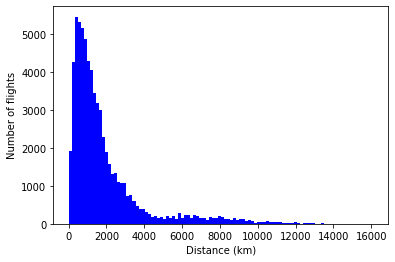

In [55]:
import matplotlib.pyplot as plt
plt.hist(distances, 100,facecolor='b')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1100k  100 1100k    0     0  5793k      0 --:--:-- --:--:-- --:--:-- 5793k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2321k  100 2321k    0     0  12.2M      0 --:--:-- --:--:-- --:--:-- 12.2M


Text(0, 0.5, 'Number of flights')

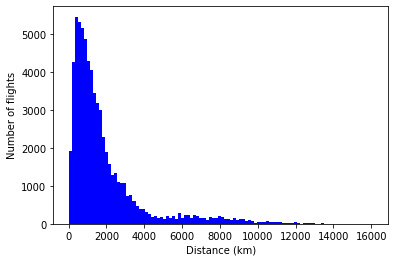

In [58]:
# altogether

!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat \
    -o airports.dat
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat \
    -o routes.dat

import csv
from geopy.distance import great_circle, geodesic

latitudes = {}
longitudes = {}
f = open("airports.dat", encoding='UTF-8')
for row in csv.reader(f):
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])
    longitudes[airport_id] = float(row[7])

distances = []
f = open("routes.dat")
for row in csv.reader(f):
    source_airport = row[3]
    dest_airport = row[5]
    if source_airport in latitudes and dest_airport in latitudes:
        source_lat = latitudes[source_airport]
        source_long = longitudes[source_airport]
        dest_lat = latitudes[dest_airport]
        dest_long = longitudes[dest_airport]
        distances.append(great_circle((source_lat,source_long),(dest_lat,dest_long)).km)

plt.hist(distances, 100,facecolor='b')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")

- another approach - slow !

Text(0, 0.5, 'Number of flights')

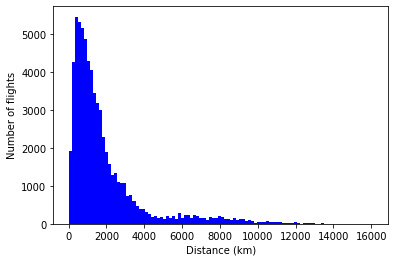

In [57]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle, geodesic

df2 = pd.read_csv("airports.dat", header=None, encoding='UTF-8')
df3 = pd.read_csv("routes.dat", header=None, encoding='UTF-8')

df2n = df2[[0,6,7]]   # id, lat, long
df3n = df3[[3,5]]     # src, dst

df2n = df2n.set_index(0)

distances2 = []

for i in range(df3n.shape[0]):
    src = df3n.iloc[i][3]
    dst = df3n.iloc[i][5]
    if (not src.isnumeric()) or (not dst.isnumeric()):     # string
        continue
    
    src, dst = int(src), int(dst)

    if src in df2n.index and dst in df2n.index:            # skip non-number values
        src_lat, src_long = df2n.loc[src][6], df2n.loc[src][7]
        dst_lat, dst_long = df2n.loc[dst][6], df2n.loc[dst][7]
        dist = great_circle((src_lat,src_long),(dst_lat,dst_long)).km
        distances2.append(dist)

plt.hist(distances2, bins=100, facecolor='b')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")